# California Housing Price Prediction

**Background of Problem Statement:**

The US Census Bureau has published California Census Data which has 10 types of metrics such as the population, median income, median housing price, and so on for each block group in California. The dataset also serves as an input for project scoping and tries to specify the functional and nonfunctional requirements for it.

**Problem Objective:**

The project aims at building a model of housing prices to predict median house values in California using the provided dataset. This model should learn from the data and be able to predict the median housing price in any district, given all the other metrics.

Districts or block groups are the smallest geographical units for which the US Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). There are 20,640 districts in the project dataset.

In [2]:
# Import the necessary libraries required 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
#from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn import metrics

#%matplotlib notebook
%matplotlib inline

### Import and Load Data

In [3]:
# Read data from the file
housing = pd.read_csv("housing.csv")
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


###  Exploratory Data Analysis


In [5]:
# Information about our data
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<Figure size 432x288 with 0 Axes>

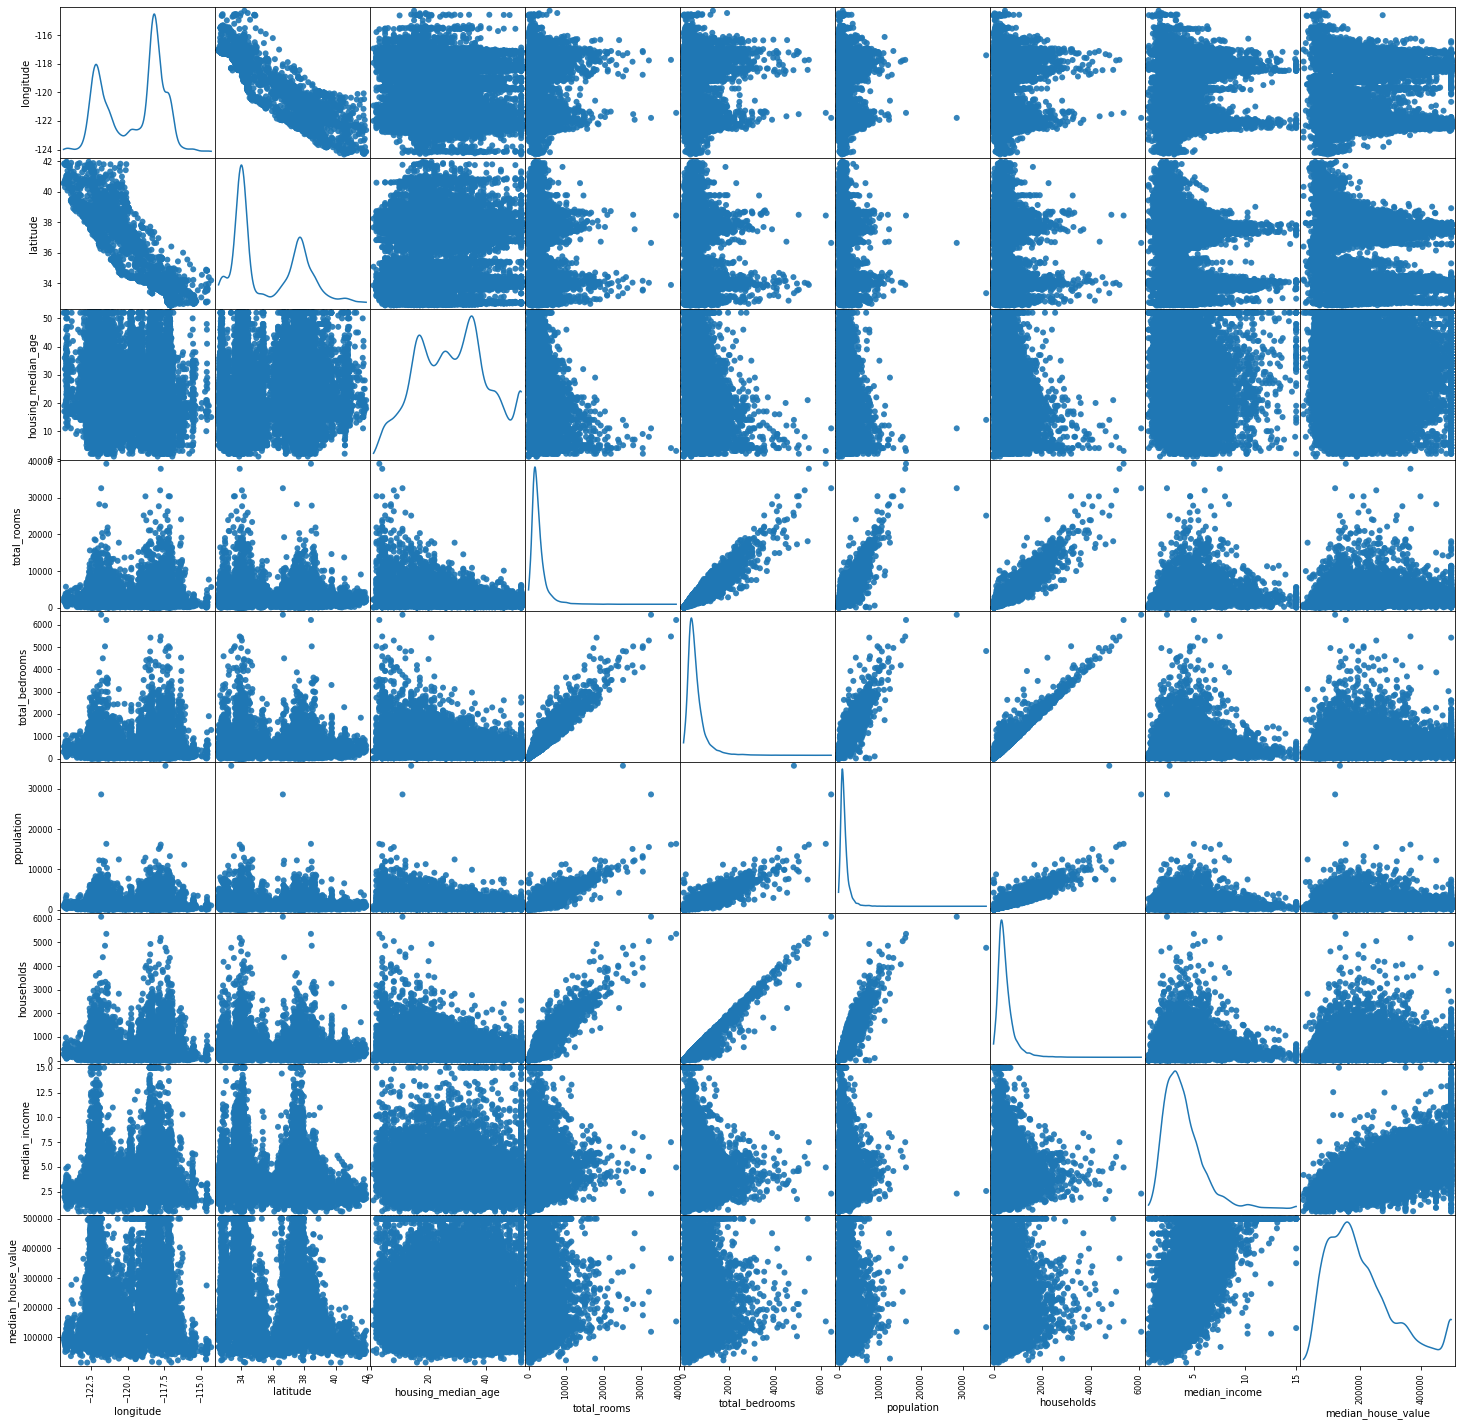

In [6]:
# Display scatter_matrix 
fig = plt.figure()
scatter_matrix(housing,figsize =(25,25),alpha=0.9,diagonal="kde",marker="o");

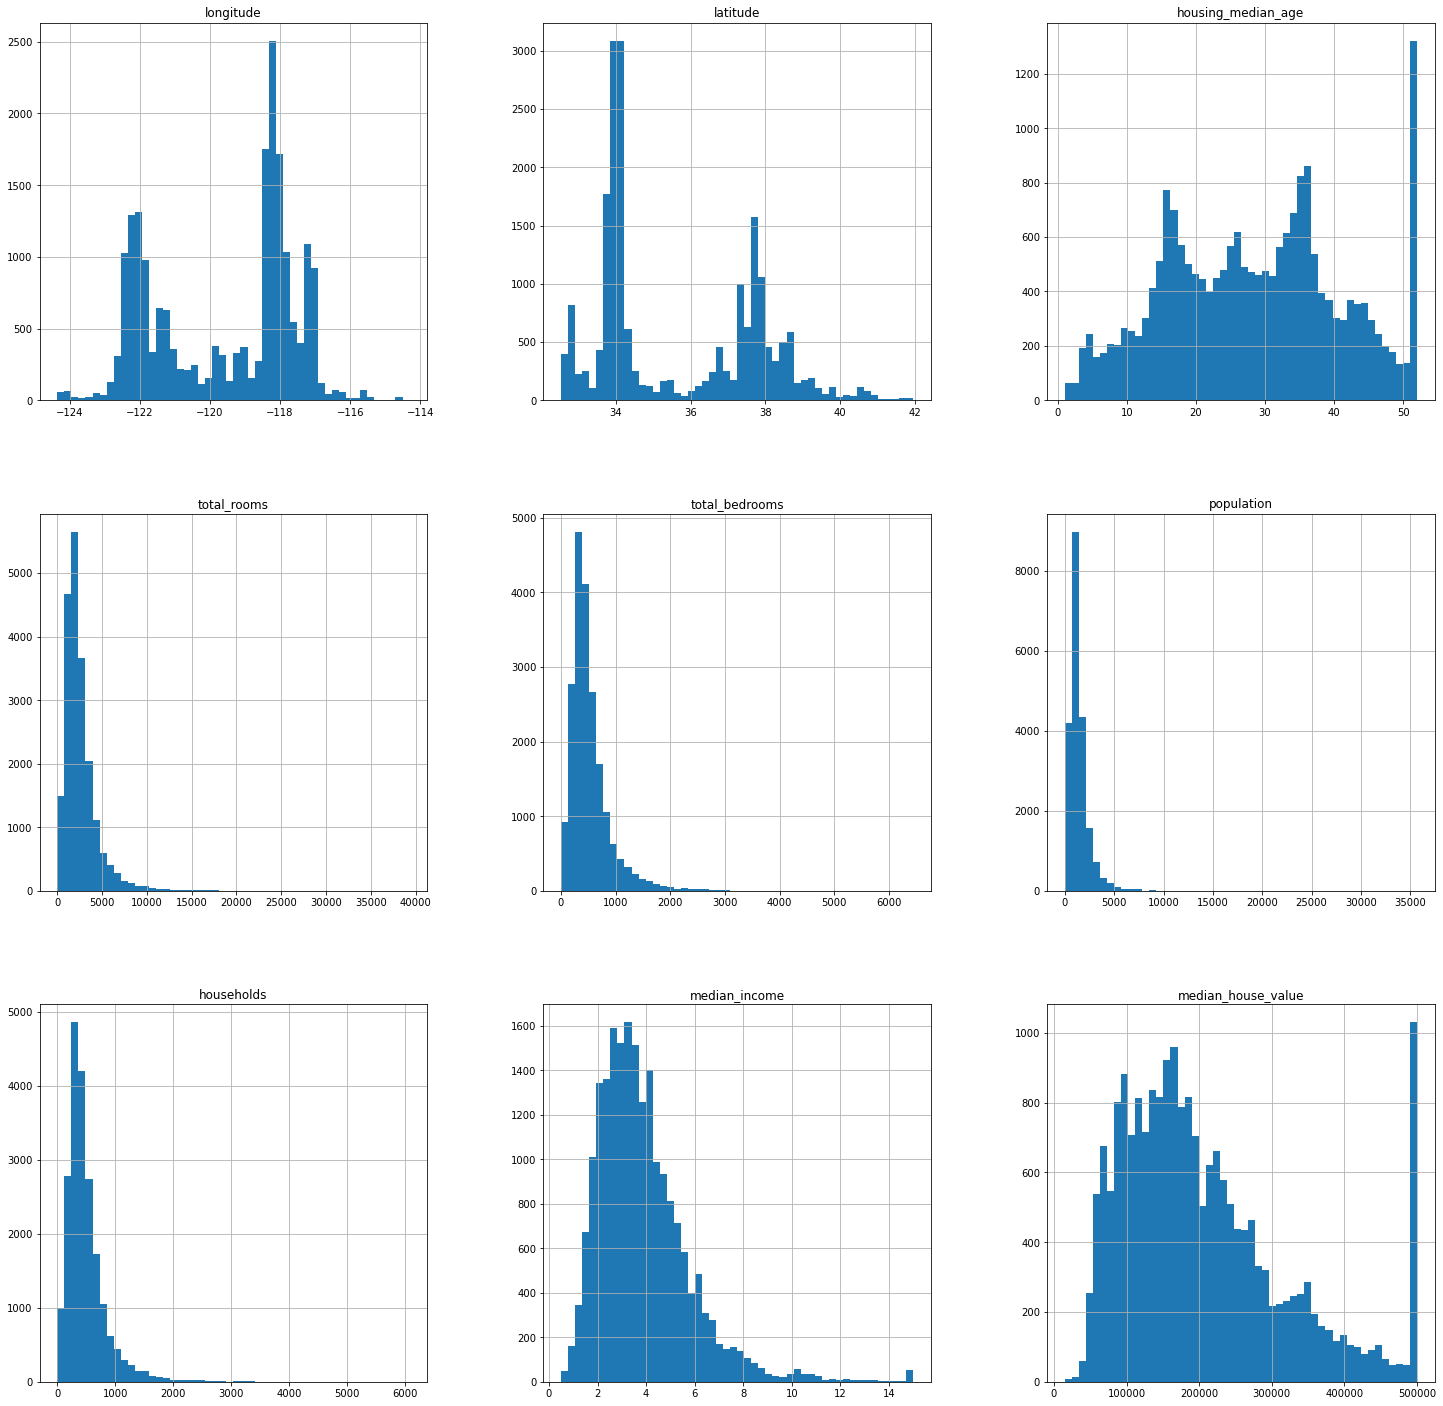

In [8]:
# Plot Histograms
housing.hist(figsize=(25,25),bins=50);

In [10]:
# Print correlation matrix
hcorr = housing.corr()
hcorr.style.background_gradient()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


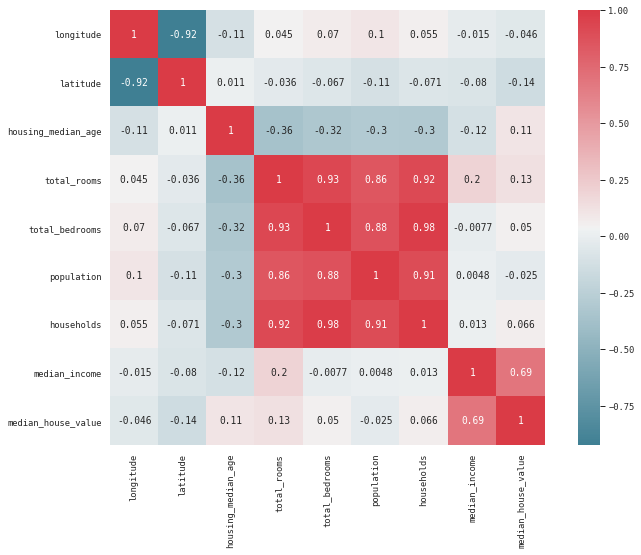

In [11]:
# Plot heatmap using seaborn
# Set the context for plotting 
sns.set(context="paper", font="monospace")
housing_corr_matrix = housing.corr()

# Set the matplotlib figure
fig, axe = plt.subplots(figsize=(12,8))

# Generate color palettes 
cmap = sns.diverging_palette(220,10,center = "light", as_cmap=True)

# Draw the heatmap
sns.heatmap(housing_corr_matrix,vmax=1,square =True, cmap=cmap,annot=True );

###  Handle Missing Values

In [12]:
# Get missing values
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [13]:
# Fill missing data in total_bathroom column
housing['total_bedrooms'].fillna(housing['total_bedrooms'].mean(), inplace=True)
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [14]:
# Label encode for categorical feature (ocean_proximity)
labelEncoder = LabelEncoder()
print(housing["ocean_proximity"].value_counts())

housing["ocean_proximity"] = labelEncoder.fit_transform(housing["ocean_proximity"])

housing["ocean_proximity"].value_counts()
housing.describe()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,1.165843
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874,1.420662
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000,1.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000,1.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,4.000000


### Split The Dataset 

In [15]:
# Split the dataset into 80% train and 20% test dataset
housing_ind = housing.drop("median_house_value", axis=1)
housing_dep = housing["median_house_value"]

#check for rand_state
X_train,X_test,y_train,y_test = train_test_split(housing_ind,housing_dep,test_size=0.2, random_state=42)
#print(X_train.head())
#print(X_test.head())
#print(y_train.head())
#print(y_test.head())
print("X_train shape {} and size {}".format(X_train.shape,X_train.size))
print("X_test shape {} and size {}".format(X_test.shape,X_test.size))
print("y_train shape {} and size {}".format(y_train.shape,y_train.size))
print("y_test shape {} and size {}".format(y_test.shape,y_test.size))

X_train shape (16512, 9) and size 148608
X_test shape (4128, 9) and size 37152
y_train shape (16512,) and size 16512
y_test shape (4128,) and size 4128


### Standardize The Data

In [16]:
#Standardize training and test datasets.
#==============================================================================
# Feature scaling is to bring all the independent variables in a dataset into
# same scale, to avoid any variable dominating  the model. Here we will not 
# transform the dependent variables.
#==============================================================================
independent_scaler = StandardScaler()
X_train = independent_scaler.fit_transform(X_train)
X_test = independent_scaler.transform(X_test)
print(X_train[0:5,:])
print("test data")
print(X_test[0:5,:])

[[ 1.27258656 -1.3728112   0.34849025  0.22256942  0.21122752  0.76827628
   0.32290591 -0.326196    2.00593172]
 [ 0.70916212 -0.87669601  1.61811813  0.34029326  0.59309419 -0.09890135
   0.6720272  -0.03584338  2.00593172]
 [-0.44760309 -0.46014647 -1.95271028 -0.34259695 -0.49522582 -0.44981806
  -0.43046109  0.14470145  2.00593172]
 [ 1.23269811 -1.38217186  0.58654547 -0.56148971 -0.40930582 -0.00743434
  -0.38058662 -1.01786438  2.00593172]
 [-0.10855122  0.5320839   1.14200767 -0.11956547 -0.25655915 -0.48587717
  -0.31496232 -0.17148831 -0.1124266 ]]
test data
[[ 2.85347282e-01  1.95100000e-01 -2.86323693e-01 -5.22861572e-01
  -1.49476515e-03 -3.03010896e-02 -3.70086730e-01 -1.15508475e+00
  -1.12426599e-01]
 [ 6.09747178e-02 -2.35490539e-01  1.10435019e-01  1.38415277e-01
  -1.49476515e-03  1.21850767e-01  2.20531996e-01 -7.08659050e-01
  -1.12426599e-01]
 [-1.42487026e+00  1.00947776e+00  1.85617335e+00  5.46309967e-01
  -1.49476515e-03 -1.02419310e-01  1.21539643e+00 -2.104

### Perform Linear Regression

Perform Linear Regression on training data. Predict output for test dataset using the fitted model. Print root mean squared error (RMSE) from Linear Regression. 

In [28]:
# Initantiate the linear regression
linearRegModel = LinearRegression(n_jobs=-1)

# Fit the model to the training data (learn the coefficients)
linearRegModel.fit(X_train,y_train)

#Print the intercept and coefficients 
print("Intercept is "+str(linearRegModel.intercept_))
print("coefficients  is "+str(linearRegModel.coef_))

#predict on the test data
y_pred = linearRegModel.predict(X_test)

Intercept is 207194.69373788778
coefficients  is [-85854.94724101 -90946.06271148  14924.30655143 -17693.23405277
  48767.60670995 -43884.16852449  17601.31495096  77144.10164179
   -451.52015229]


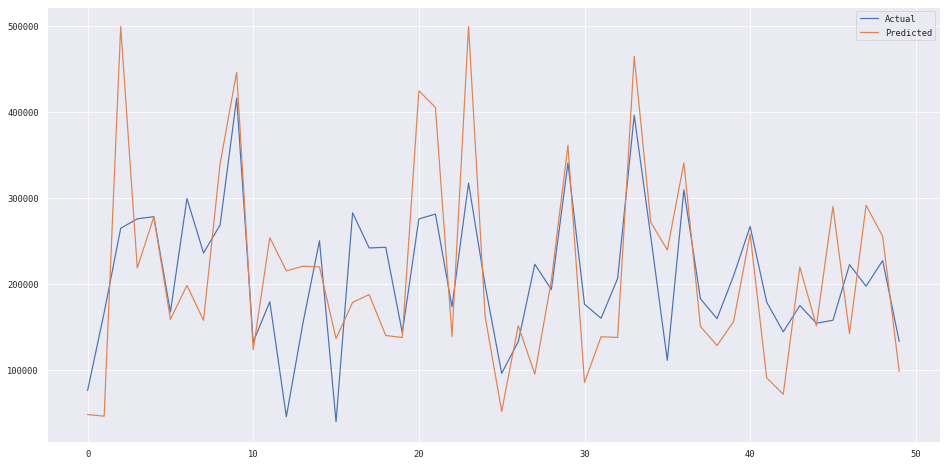

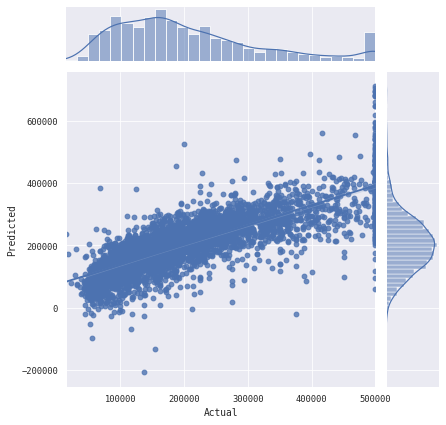

In [29]:
test = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);

In [33]:
# Root Mean Squared Error (RMSE)
print(np.sqrt(metrics.mean_squared_error(y_train,linearRegModel.predict(X_train))))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print()
print("R-square: ", metrics.r2_score(y_test,y_pred))

69361.0714290645
71098.69982050032

R-square:  0.6142406531011787


### Perform Decision Tree Regression

Perform Decision Tree Regression on training data. Predict output for test dataset using the fitted model.

In [49]:
dtReg = DecisionTreeRegressor(max_depth = 9)
dtReg.fit(X_train,y_train)
dtReg_y_pred = dtReg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test,dtReg_y_pred)))
print()
print("R-square: ", metrics.r2_score(y_test,dtReg_y_pred))

61386.00695926165

R-square:  0.7124377264675774


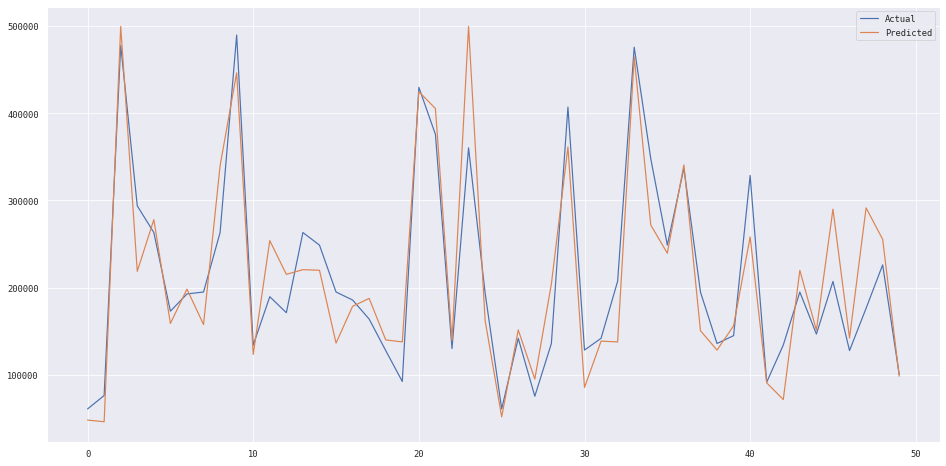

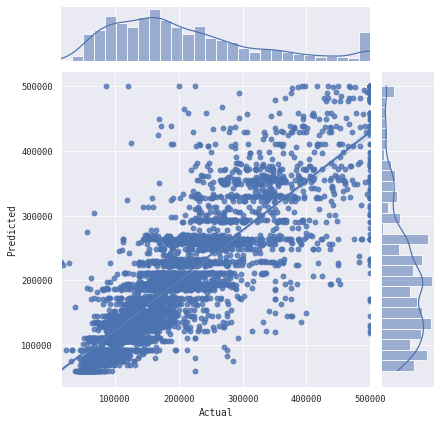

In [50]:
test = pd.DataFrame({'Predicted':dtReg_y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind="reg")

### Perform Random Forest Regression

Perform Random Forest Regression on training data. Predict output for test dataset using the fitted model. Print RMSE (root mean squared error) from Random Forest Regression.

In [51]:
rfReg = RandomForestRegressor(n_estimators=100, max_depth= 9)
rfReg.fit(X_train,y_train)
rfReg_y_pred = rfReg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test,rfReg_y_pred)))
print()
print("R-square: ", metrics.r2_score(y_test, rfReg_y_pred))

55264.37993358817

R-square:  0.7669314130048244


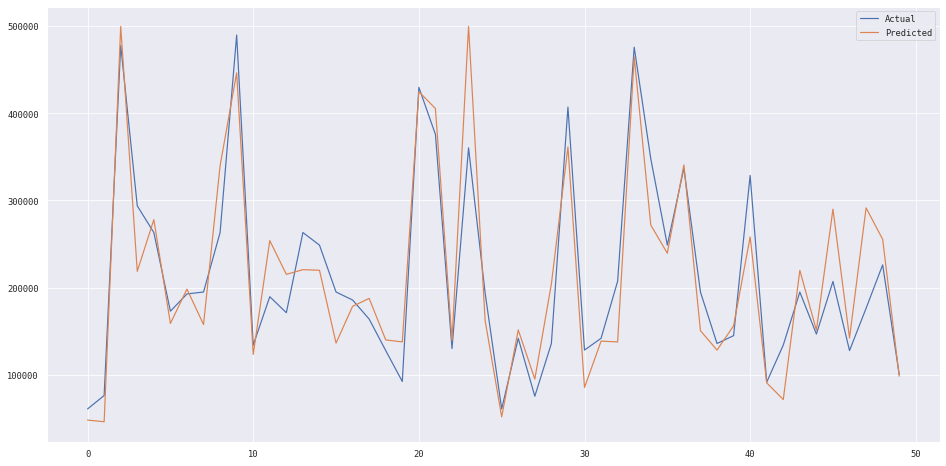

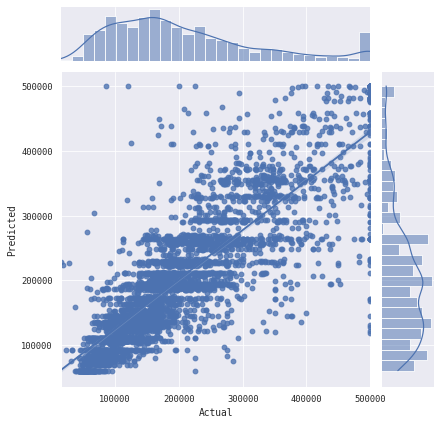

In [52]:
test = pd.DataFrame({'Predicted':dtReg_y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind="reg")

### Perform Gradient Boosting Regression
Perform Gradient Boosting Regression on training data. Predict output for test dataset using the fitted model. Print RMSE (root mean squared error) from Gradient Boosting Regression.

In [43]:
gbReg = GradientBoostingRegressor(n_estimators=100, max_depth= 9)
gbReg.fit(X_train,y_train)
gbReg_y_pred = gbReg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, gbReg_y_pred)))
print()
print("R-square: ", metrics.r2_score(y_test, gbReg_y_pred))

47589.488665551056

R-square:  0.8271715571966824


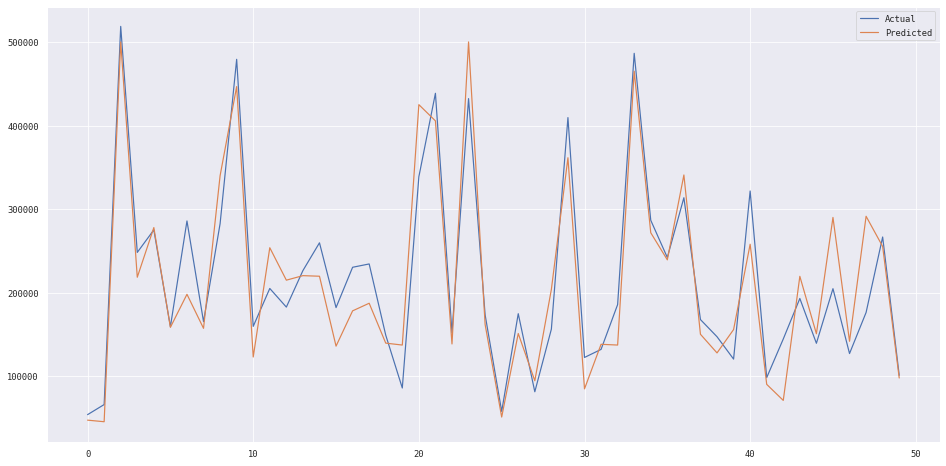

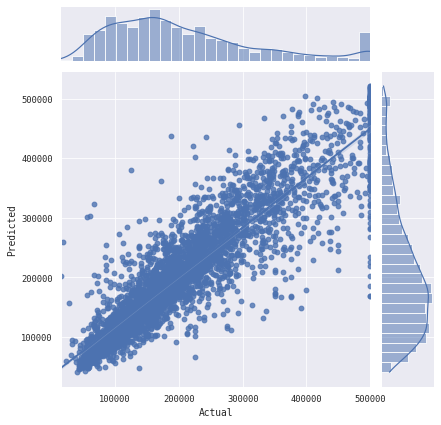

In [44]:
test = pd.DataFrame({'Predicted':gbReg_y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind="reg")

### Perform Simple Neural Network Regression

In [57]:
# Import Keras Labaries 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [59]:
simple_nn = Sequential()
simple_nn.add(InputLayer((9,)))
simple_nn.add(Dense(2, 'relu'))
simple_nn.add(Dense(1, 'linear'))

opt = Adam(learning_rate=0.1)
cp = ModelCheckpoint('models.simple_nn', save_best_only=True)
simple_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])
simple_nn.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), callbacks=[cp], epochs=100)

Epoch 1/100
477/516 [==========================>...] - ETA: 0s - loss: 53221261312.0000 - root_mean_squared_error: 230697.3438WARNING:tensorflow:From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\training\tracking\tracking.py:111: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: models.simple_nn\assets
516/516 [==============================] - 1s 2ms/step - loss: 52687310848.0000 - root_mean_squared_error: 229537.1719 - val_loss: 44855312384.0000 - val_root_mean_squared_error: 211790.7344
Epoch 2/100
516/516 [==============================] - 1s 2ms/step - loss: 37354287104.0000 - root_mean_squared_error: 193272.5781 - val_loss: 29523

516/516 [==============================] - 1s 2ms/step - loss: 4616320512.0000 - root_mean_squared_error: 67943.5078 - val_loss: 4838362112.0000 - val_root_mean_squared_error: 69558.3359
Epoch 22/100
516/516 [==============================] - 1s 2ms/step - loss: 4605885952.0000 - root_mean_squared_error: 67866.6797 - val_loss: 4825960960.0000 - val_root_mean_squared_error: 69469.1406
Epoch 23/100
516/516 [==============================] - 1s 2ms/step - loss: 4595944448.0000 - root_mean_squared_error: 67793.3984 - val_loss: 4819598848.0000 - val_root_mean_squared_error: 69423.3281
Epoch 24/100
516/516 [==============================] - 1s 2ms/step - loss: 4589226496.0000 - root_mean_squared_error: 67743.8281 - val_loss: 4817999872.0000 - val_root_mean_squared_error: 69411.8125
Epoch 25/100
516/516 [==============================] - 1s 2ms/step - loss: 4580813312.0000 - root_mean_squared_error: 67681.7031 - val_loss: 4817068032.0000 - val_root_mean_squared_error: 69405.1016
Epoch 26/100


Epoch 43/100
516/516 [==============================] - 1s 2ms/step - loss: 4483056640.0000 - root_mean_squared_error: 66955.6328 - val_loss: 4707442176.0000 - val_root_mean_squared_error: 68610.8047
Epoch 44/100
516/516 [==============================] - 1s 2ms/step - loss: 4474219008.0000 - root_mean_squared_error: 66889.6016 - val_loss: 4702300160.0000 - val_root_mean_squared_error: 68573.3203
Epoch 45/100
516/516 [==============================] - 1s 2ms/step - loss: 4472550912.0000 - root_mean_squared_error: 66877.1328 - val_loss: 4688183808.0000 - val_root_mean_squared_error: 68470.3125
Epoch 46/100
516/516 [==============================] - 1s 2ms/step - loss: 4467463168.0000 - root_mean_squared_error: 66839.0859 - val_loss: 4681989632.0000 - val_root_mean_squared_error: 68425.0625
Epoch 47/100
516/516 [==============================] - 1s 2ms/step - loss: 4463247360.0000 - root_mean_squared_error: 66807.5391 - val_loss: 4674721792.0000 - val_root_mean_squared_error: 68371.9375


516/516 [==============================] - 0s 839us/step - loss: 4406041600.0000 - root_mean_squared_error: 66378.0234 - val_loss: 4604143104.0000 - val_root_mean_squared_error: 67853.8359
Epoch 67/100
516/516 [==============================] - 1s 2ms/step - loss: 4404142080.0000 - root_mean_squared_error: 66363.7109 - val_loss: 4595610624.0000 - val_root_mean_squared_error: 67790.9297
Epoch 68/100
516/516 [==============================] - 1s 2ms/step - loss: 4401846784.0000 - root_mean_squared_error: 66346.4141 - val_loss: 4591286272.0000 - val_root_mean_squared_error: 67759.0312
Epoch 69/100
516/516 [==============================] - 0s 800us/step - loss: 4399653888.0000 - root_mean_squared_error: 66329.8906 - val_loss: 4608434176.0000 - val_root_mean_squared_error: 67885.4453
Epoch 70/100
516/516 [==============================] - 1s 2ms/step - loss: 4399662592.0000 - root_mean_squared_error: 66329.9531 - val_loss: 4586166272.0000 - val_root_mean_squared_error: 67721.2422
Epoch 71/

Epoch 94/100
516/516 [==============================] - 1s 1ms/step - loss: 4367360512.0000 - root_mean_squared_error: 66086.0078 - val_loss: 4555645440.0000 - val_root_mean_squared_error: 67495.5234
Epoch 95/100
516/516 [==============================] - 0s 950us/step - loss: 4365406720.0000 - root_mean_squared_error: 66071.2266 - val_loss: 4554647552.0000 - val_root_mean_squared_error: 67488.1328
Epoch 96/100
516/516 [==============================] - 0s 775us/step - loss: 4364825088.0000 - root_mean_squared_error: 66066.8203 - val_loss: 4552555520.0000 - val_root_mean_squared_error: 67472.6250
Epoch 97/100
516/516 [==============================] - 1s 2ms/step - loss: 4363382784.0000 - root_mean_squared_error: 66055.9062 - val_loss: 4547112960.0000 - val_root_mean_squared_error: 67432.2812
Epoch 98/100
516/516 [==============================] - 1s 2ms/step - loss: 4363340288.0000 - root_mean_squared_error: 66055.5859 - val_loss: 4543936512.0000 - val_root_mean_squared_error: 67408.7

In [62]:
from tensorflow.keras.models import load_model
simple_nn = load_model('models.simple_nn')

print(np.sqrt(metrics.mean_squared_error(y_test, simple_nn.predict(X_test))))
print()
print("R-square: ", metrics.r2_score(y_test, simple_nn.predict(X_test)))

67408.73011067537

R-square:  0.6532428447465555
